# Bussines Understanding

Customer churn atau kehilangan pelanggan adalah salah satu masalah terbesar dalam bisnis, terutama pada
industri telekomunikasi yang memiliki persaingan yang sangat ketat. Penelitian menunjukkan bahwa rata-rata churn
rate bulanan di antara 4 operator nirkabel teratas di AS adalah 1,9% - 2%. Customer churn rate merupakan isu
penting bagi perusahaan telekomunikasi karena persentase pelanggan yang hilang tersebut sangat memengaruhi
growth rate perusahaan.
Sebagai seorang associate data scientist, Anda ditugaskan untuk melakukan prediksi terhadap kemungkinan
terjadinya customer churn. Diharapkan pemodelan yang dihasilkan dapat membantu perusahaan dalam memahami
berapa banyak pelanggan yang meninggalkan bisnis, dan mengapa mereka keluar. Ini penting dalam menyusun
strategi pemasaran dan retensi pelanggan perusahaan

## Tujuan

Membuat model klasifikasi menggunakan decision tree dan satu model pilihan lainnya, untuk memprediksi
customer churn pada perusahaan telekomunikasi. Berdasarkan hasil pemodelan data, anda diminta untuk
mengevaluasi kinerja model klasifikasi dan menginterpretasikan fitur-fitur mana yang paling berpengaruh
terhadap hasil prediksi fitur target

## Objective models

 model klasifikasi: accuracy > 70%


# load data

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Mengabaikan semua peringatan
warnings.filterwarnings("ignore")

In [ ]:
# load data set yang digunakan
data = pd.read_csv('https://raw.githubusercontent.com/arubhasy/dataset/main/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.shape


(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari output tersebut, Kita Dapat Melihat jumlah Kolom Dan Baris Tipe Data Dan Nilai Yang Hilang
*   pada Data diatas 1 Kolom Adalah Tipe Data Int Dan 2 Tipe Data Float Dan 18 Adalah Tipe Data Objek
*   tipe data masih ada yang tidak sesuai
*   Dalam Data 7043 Baris Dan 21 Kolom.
* nilai hilang pada gender dan tenure


In [ ]:
# Mengubah tipe data kolom TotalCharges menjadi numerik
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data = data.dropna()
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#melihat nilai unik setiap fitur

# Loop melalui setiap kolom dalam DataFrame yang memiliki tipe data objek (data kategorikal)
for col in data.select_dtypes('object').columns:
    # Mencetak nama kolom dan jumlah nilai unik yang ditemukan dalam kolom tersebut
    print(col, '- # unique values:', data[col].unique())


customerID - # unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender - # unique values: ['F' 'Male' 'Female' 'M']
Partner - # unique values: ['Yes' 'No']
Dependents - # unique values: ['No' 'Yes']
PhoneService - # unique values: ['No' 'Yes']
MultipleLines - # unique values: ['No phone service' 'No' 'Yes']
InternetService - # unique values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity - # unique values: ['No' 'Yes' 'No internet service']
OnlineBackup - # unique values: ['Yes' 'No' 'No internet service']
DeviceProtection - # unique values: ['No' 'Yes' 'No internet service']
TechSupport - # unique values: ['No' 'Yes' 'No internet service']
StreamingTV - # unique values: ['No' 'Yes' 'No internet service']
StreamingMovies - # unique values: ['No' 'Yes' 'No internet service']
Contract - # unique values: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - # unique values: ['Yes' 'No']
PaymentMethod - # unique values: ['Electronic check

In [ ]:
#merubah nilai gender f menjadi female dan m menjadi male (agar sesuai)
data['gender'] = data['gender'].replace({'F': 'Female', 'M': 'Male'})

In [ ]:
df=data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7025 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7025 non-null   object 
 1   gender            7025 non-null   object 
 2   SeniorCitizen     7025 non-null   int64  
 3   Partner           7025 non-null   object 
 4   Dependents        7025 non-null   object 
 5   tenure            7025 non-null   float64
 6   PhoneService      7025 non-null   object 
 7   MultipleLines     7025 non-null   object 
 8   InternetService   7025 non-null   object 
 9   OnlineSecurity    7025 non-null   object 
 10  OnlineBackup      7025 non-null   object 
 11  DeviceProtection  7025 non-null   object 
 12  TechSupport       7025 non-null   object 
 13  StreamingTV       7025 non-null   object 
 14  StreamingMovies   7025 non-null   object 
 15  Contract          7025 non-null   object 
 16  PaperlessBilling  7025 non-null   object 
 17  

In [ ]:
df.duplicated().sum()

0

# menelaah data

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7025.000000  7025.000000     7025.000000   7025.000000
mean        0.162420    35.107616       64.783573   2283.251964
std         0.368862   115.396389       30.077709   2266.970388
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.550000    401.300000
50%         0.000000    29.000000       70.350000   1396.900000
75%         0.000000    56.000000       89.850000   3794.500000
max         1.000000  7100.000000      118.750000   8684.800000


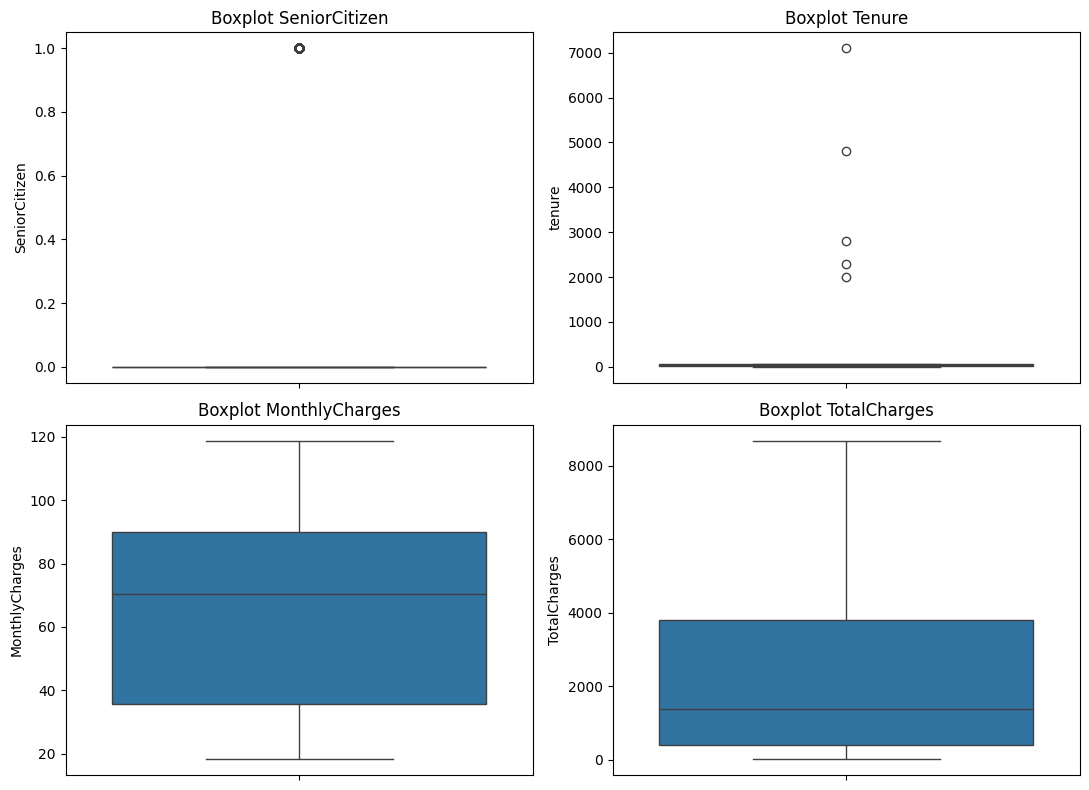

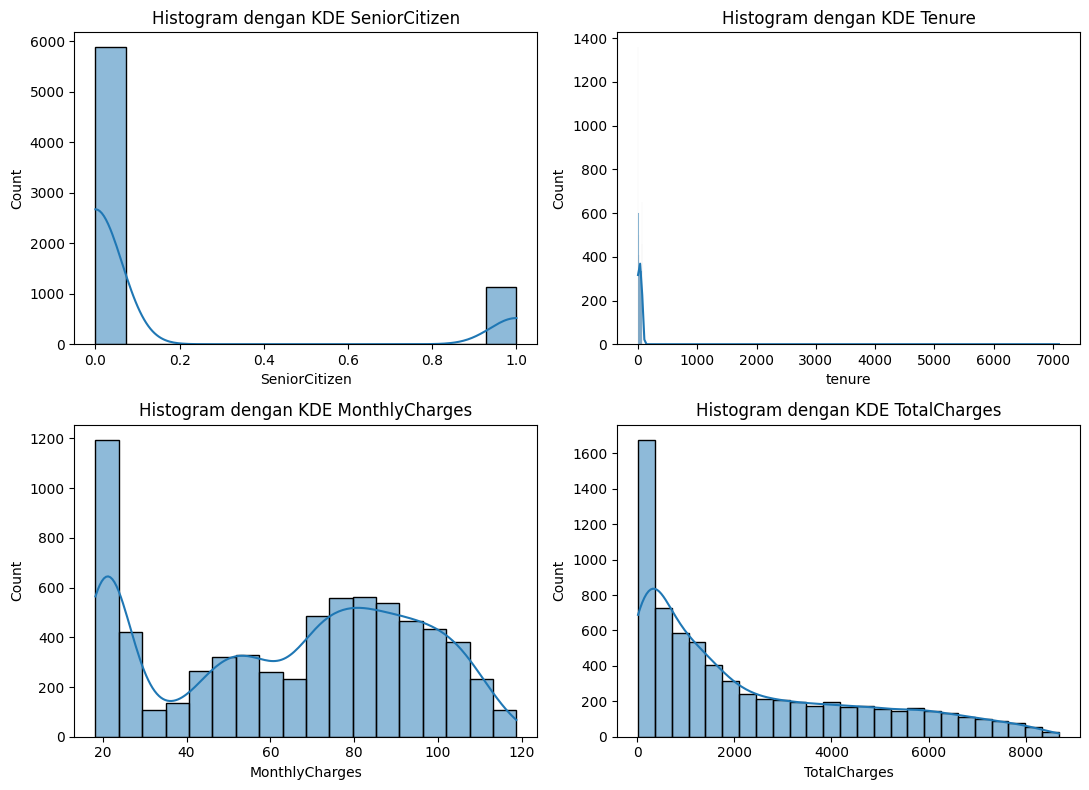

<Figure size 1100x700 with 0 Axes>

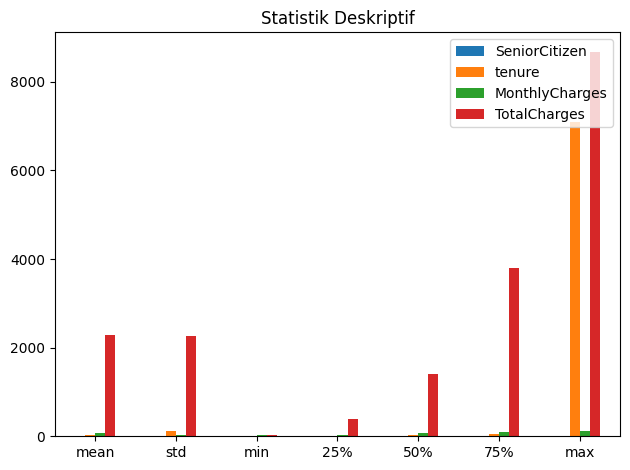

In [ ]:
# Mendapatkan statistik deskriptif
descriptive_stats = data.describe()
print(descriptive_stats)

# Membuat grafik dari hasil analisis deskriptif
plt.figure(figsize=(11, 8))

# Boxplot untuk melihat distribusi dan outliers SeniorCitizen
plt.subplot(2, 2, 1)
sns.boxplot(y=data['SeniorCitizen'])
plt.title('Boxplot SeniorCitizen')

# Boxplot untuk melihat distribusi dan outliers Tenure
plt.subplot(2, 2, 2)
sns.boxplot(y=data['tenure'])
plt.title('Boxplot Tenure')

# Boxplot untuk melihat distribusi dan outliers MonthlyCharges
plt.subplot(2, 2, 3)
sns.boxplot(y=data['MonthlyCharges'])
plt.title('Boxplot MonthlyCharges')

# Boxplot untuk melihat distribusi dan outliers TotalCharges
plt.subplot(2, 2, 4)
sns.boxplot(y=data['TotalCharges'])
plt.title('Boxplot TotalCharges')

plt.tight_layout()
plt.show()

# Histogram dengan KDE untuk melihat distribusi data
plt.figure(figsize=(11, 8))

# Histogram dengan KDE untuk melihat distribusi SeniorCitizen
plt.subplot(2, 2, 1)
sns.histplot(data['SeniorCitizen'], kde=True)
plt.title('Histogram dengan KDE SeniorCitizen')

# Histogram dengan KDE untuk melihat distribusi Tenure
plt.subplot(2, 2, 2)
sns.histplot(data['tenure'], kde=True)
plt.title('Histogram dengan KDE Tenure')

# Histogram dengan KDE untuk melihat distribusi MonthlyCharges
plt.subplot(2, 2, 3)
sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Histogram dengan KDE MonthlyCharges')

# Histogram dengan KDE untuk melihat distribusi TotalCharges
plt.subplot(2, 2, 4)
sns.histplot(data['TotalCharges'], kde=True)
plt.title('Histogram dengan KDE TotalCharges')

plt.tight_layout()
plt.show()

# Bar plot dari statistik deskriptif
plt.figure(figsize=(11, 7))
# Menampilkan bar plot untuk mean, std, min, quartile, dll.
descriptive_stats.loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].plot(kind='bar')
plt.title('Statistik Deskriptif')
plt.xticks(rotation=0)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


# data eksplorasi

Jumlah Tidak Churn: 5157
Jumlah Churn: 1868


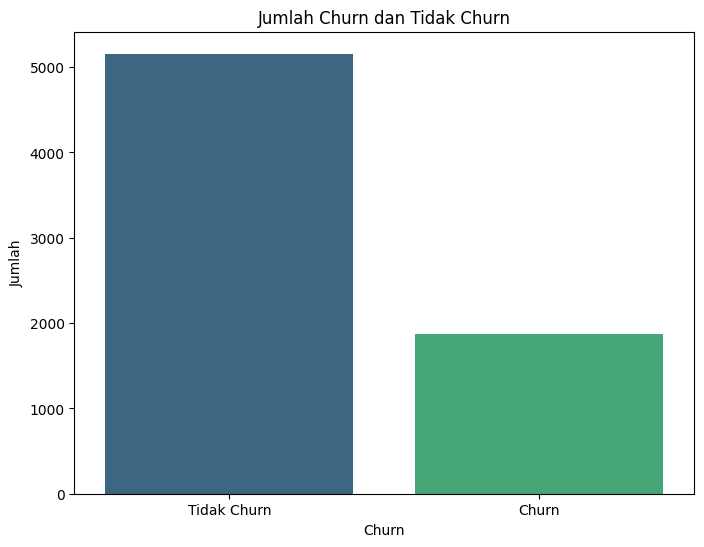

In [ ]:
# Menghitung jumlah churn
churn_counts = df['Churn'].value_counts()

print("Jumlah Tidak Churn:", churn_counts[0])
print("Jumlah Churn:", churn_counts[1])

# Membuat visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")
plt.title('Jumlah Churn dan Tidak Churn')
plt.xlabel('Churn')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Tidak Churn', 'Churn'])
plt.show()


Jumlah pria: 3546
Jumlah wanita: 3479


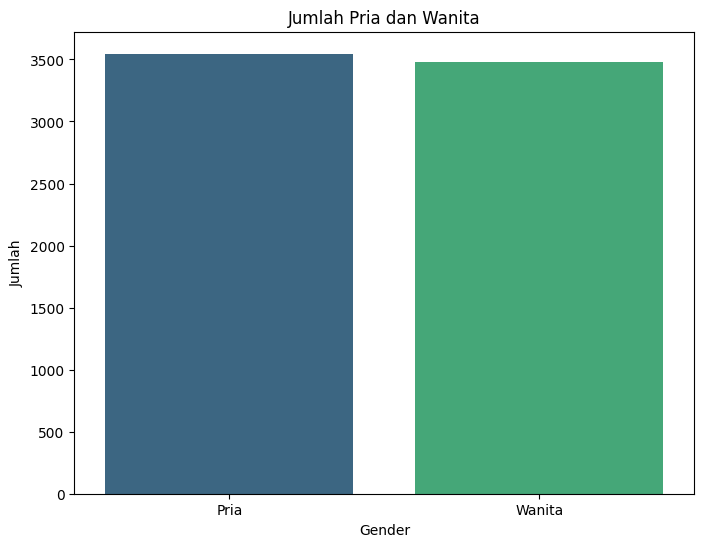

In [ ]:
# Menghitung jumlah pria dan wanita
gender_counts = df['gender'].value_counts()

print("Jumlah pria:", gender_counts['Male'])
print("Jumlah wanita:", gender_counts['Female'])

# Membuat visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title('Jumlah Pria dan Wanita')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Pria', 'Wanita'])
plt.show()


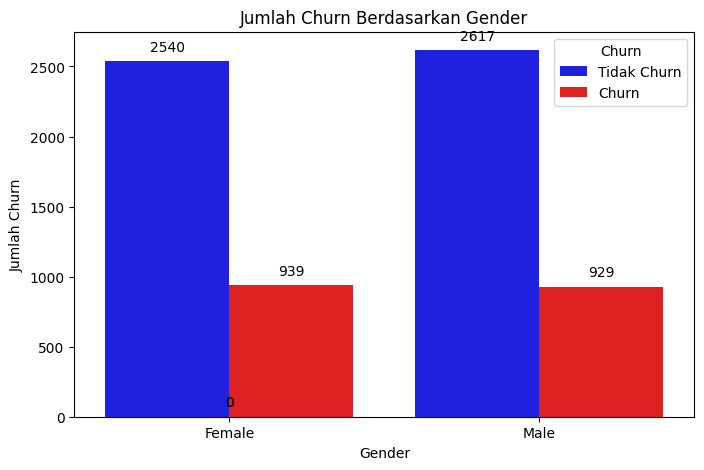

In [ ]:
# Membuat jumlah churn Berdasarkan Gender
plt.figure(figsize=(8, 5))
# Menggambar count plot dengan x='gender' dan hue='Churn' menggunakan data df
ax = sns.countplot(x='gender', hue='Churn', data=df, palette=['blue', 'red'])

# Menambahkan anotasi untuk setiap bar
for p in ax.patches:
    # Mengambil tinggi dari bar
    count = int(p.get_height())
    # Menambahkan teks yang menunjukkan jumlah di tengah bar
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Jumlah Churn Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Churn')
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])
plt.show()



In [ ]:
# melihat jumlah churn bedasarkan setiap kategori
import math

def plot_categorical_to_target(df, categorical_values, target):
    """
    Memplot variabel kategorik terhadap target menggunakan diagram batang.

    Parameters:
    - df: DataFrame yang berisi data.
    - categorical_values: Daftar nama kolom variabel kategorik.
    - target: Nama kolom target.
    """
    # Menentukan jumlah kolom dan baris berdasarkan jumlah nilai kategorikal dan jumlah kolom yang diinginkan
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values) / number_of_columns)

    # Membuat subplots dengan ukuran sesuai dengan jumlah baris dan kolom yang telah ditentukan
    fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(15, 5 * number_of_rows))

    # Loop melalui setiap nilai kategorikal dan membuat count plot untuk setiap kolom
    for i, column in enumerate(categorical_values):
        # Menghitung indeks baris dan kolom untuk setiap subplot
        row = i // number_of_columns
        col = i % number_of_columns
        # Memilih sumbu yang sesuai dari subplots
        ax = axes[row][col]
        # Menggambar count plot untuk nilai kategorikal tertentu dengan menggunakan data dan target yang diberikan
        sns.countplot(x=column, data=df, hue=target, palette="Blues", ax=ax)
        # Menetapkan judul plot sesuai dengan nilai kategorikal
        ax.set_title(column)

    # Menyusun tata letak subplot agar terlihat rapi
    plt.tight_layout()
    # Menampilkan plot
    plt.show()


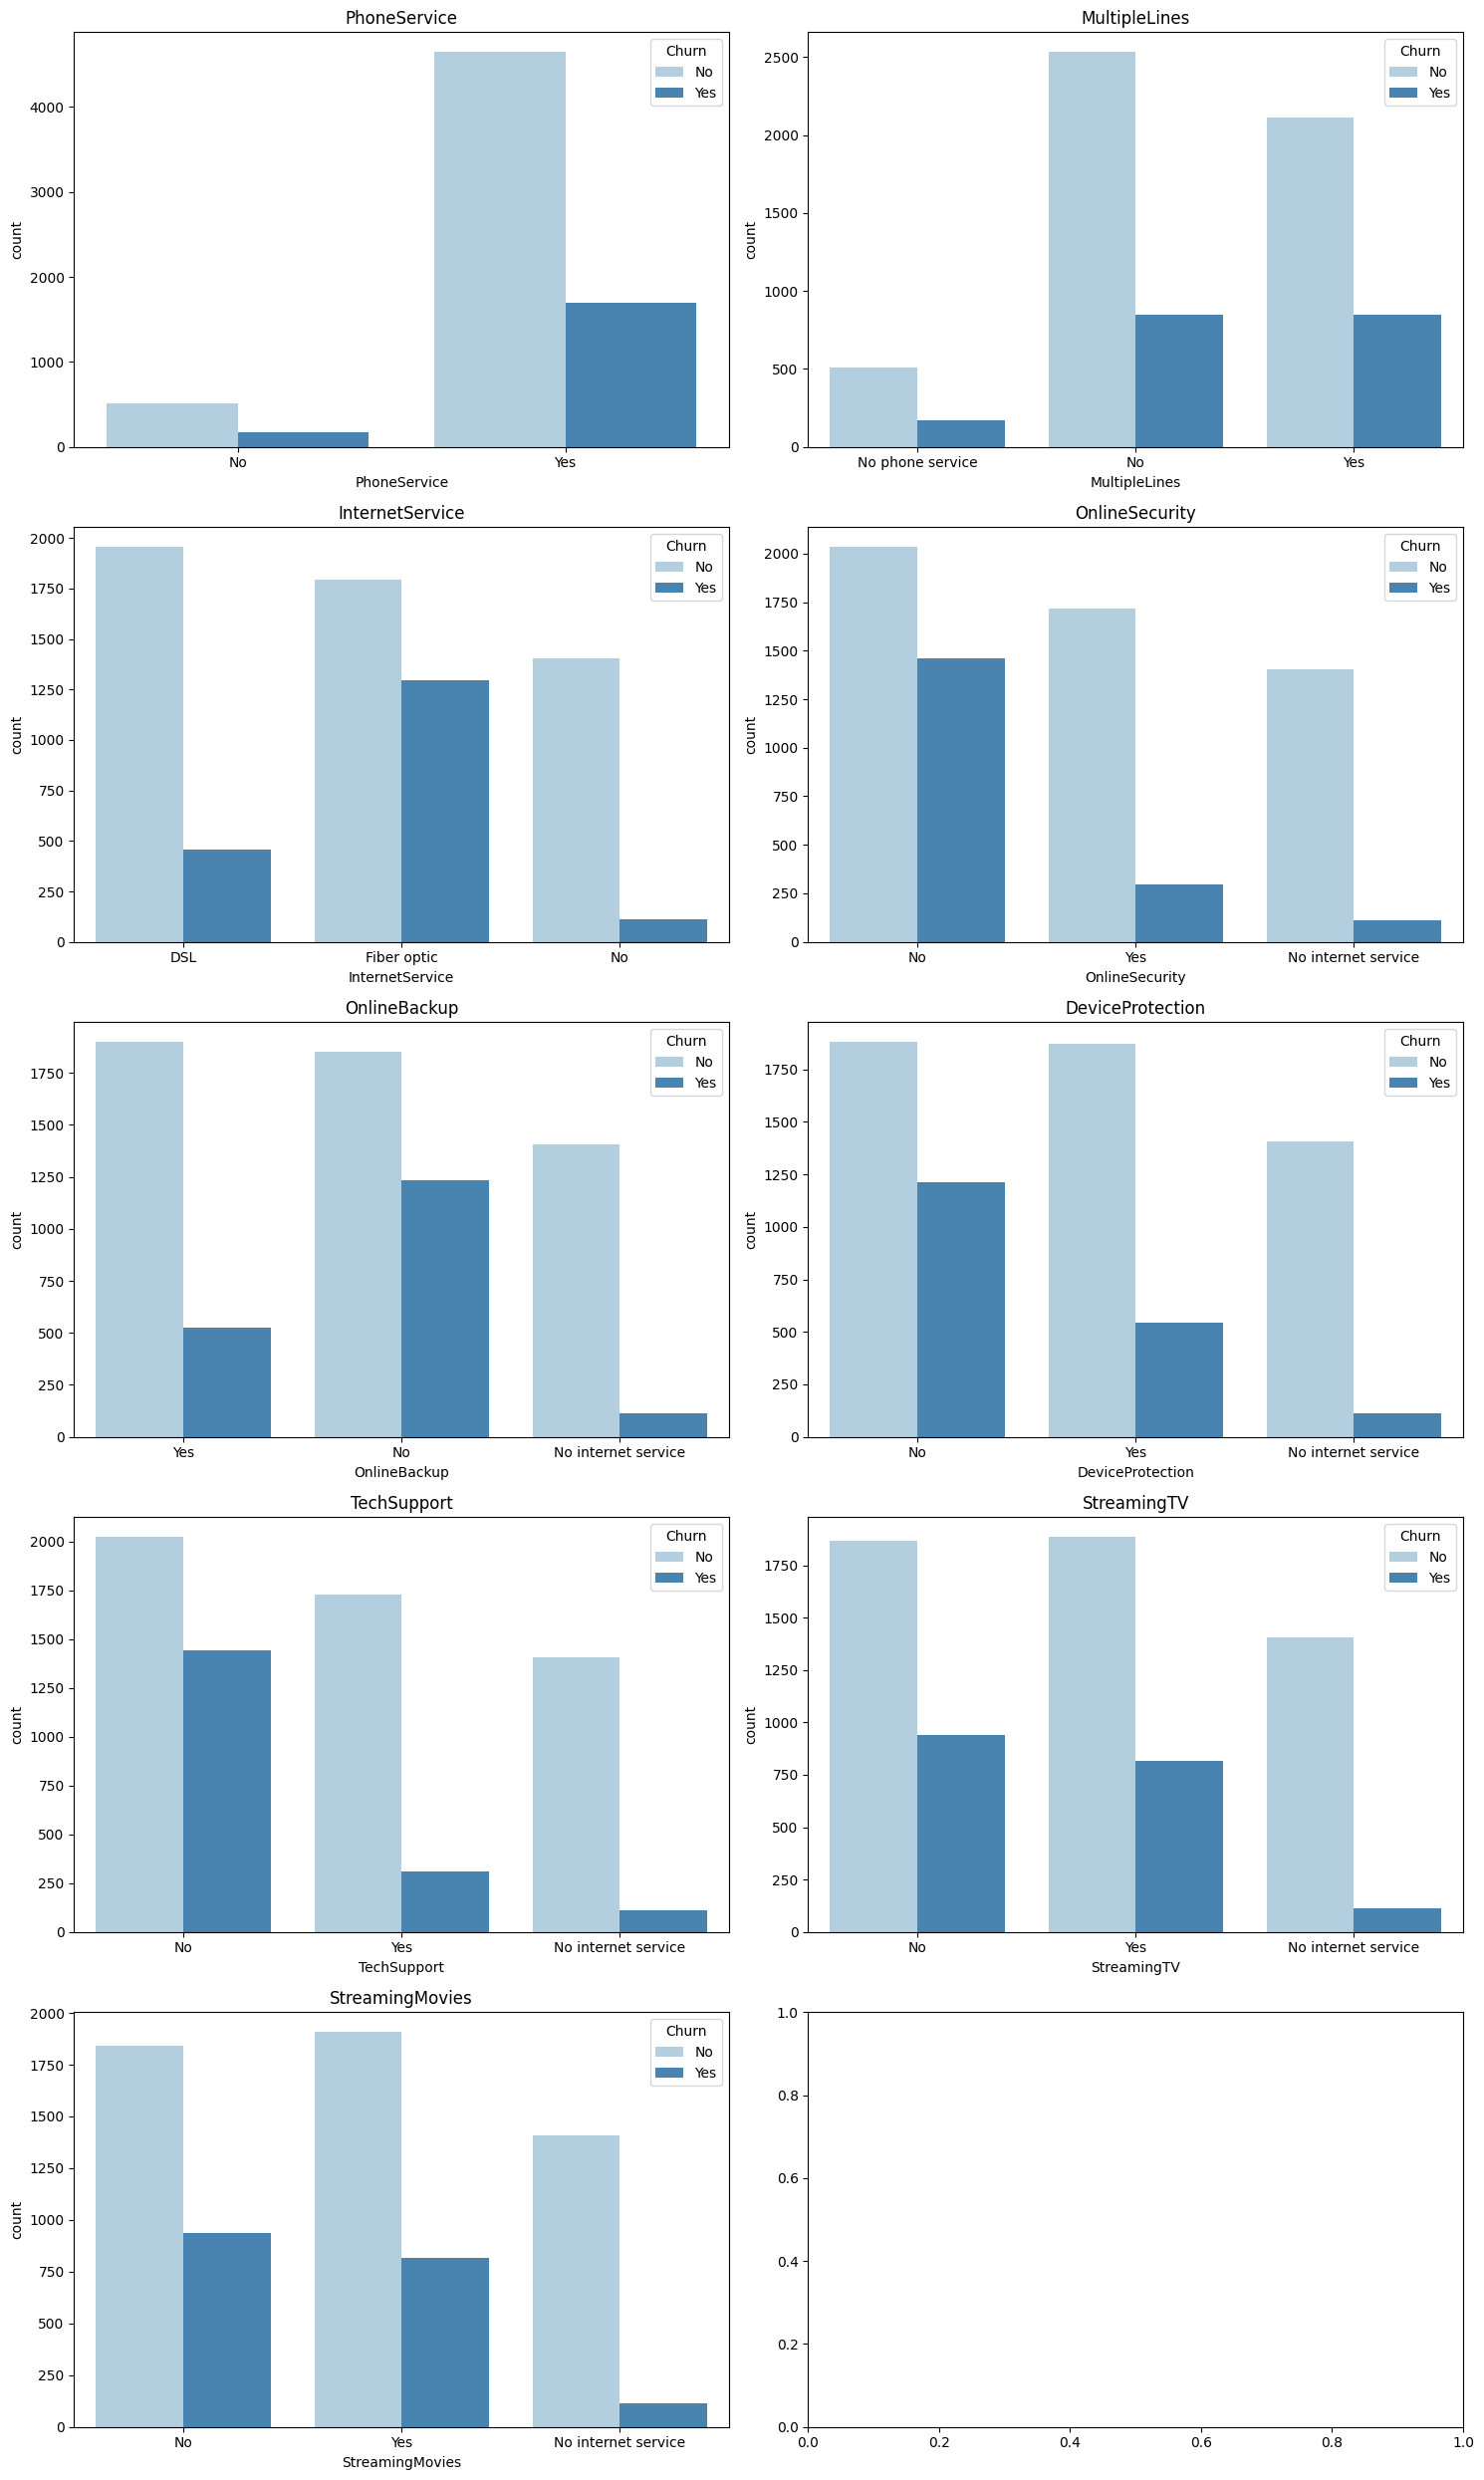

In [ ]:
# Analysis Services Each Customer
plot_categorical_to_target(df, ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"], 'Churn')

Kita dapat mengambil kesimpulan berikut dengan mengevaluasi atribut layanan

- Tingkat churn yang cukup tinggi bagi pelanggan yang memiliki layanan telepon.
Pelanggan dengan layanan internet fiber optic mempunyai churn rate yang lebih tinggi dibandingkan dengan DSL dan No.
- Tingkat churn yang jauh lebih tinggi bagi pelanggan tanpa keamanan online.
- Pelanggan yang tidak memiliki akses terhadap dukungan teknis cenderung lebih sering keluar dibandingkan mereka yang memiliki akses.
- Pelanggan tanpa cadangan online dan perlindungan perangkat memiliki tingkat churn yang lebih tinggi.

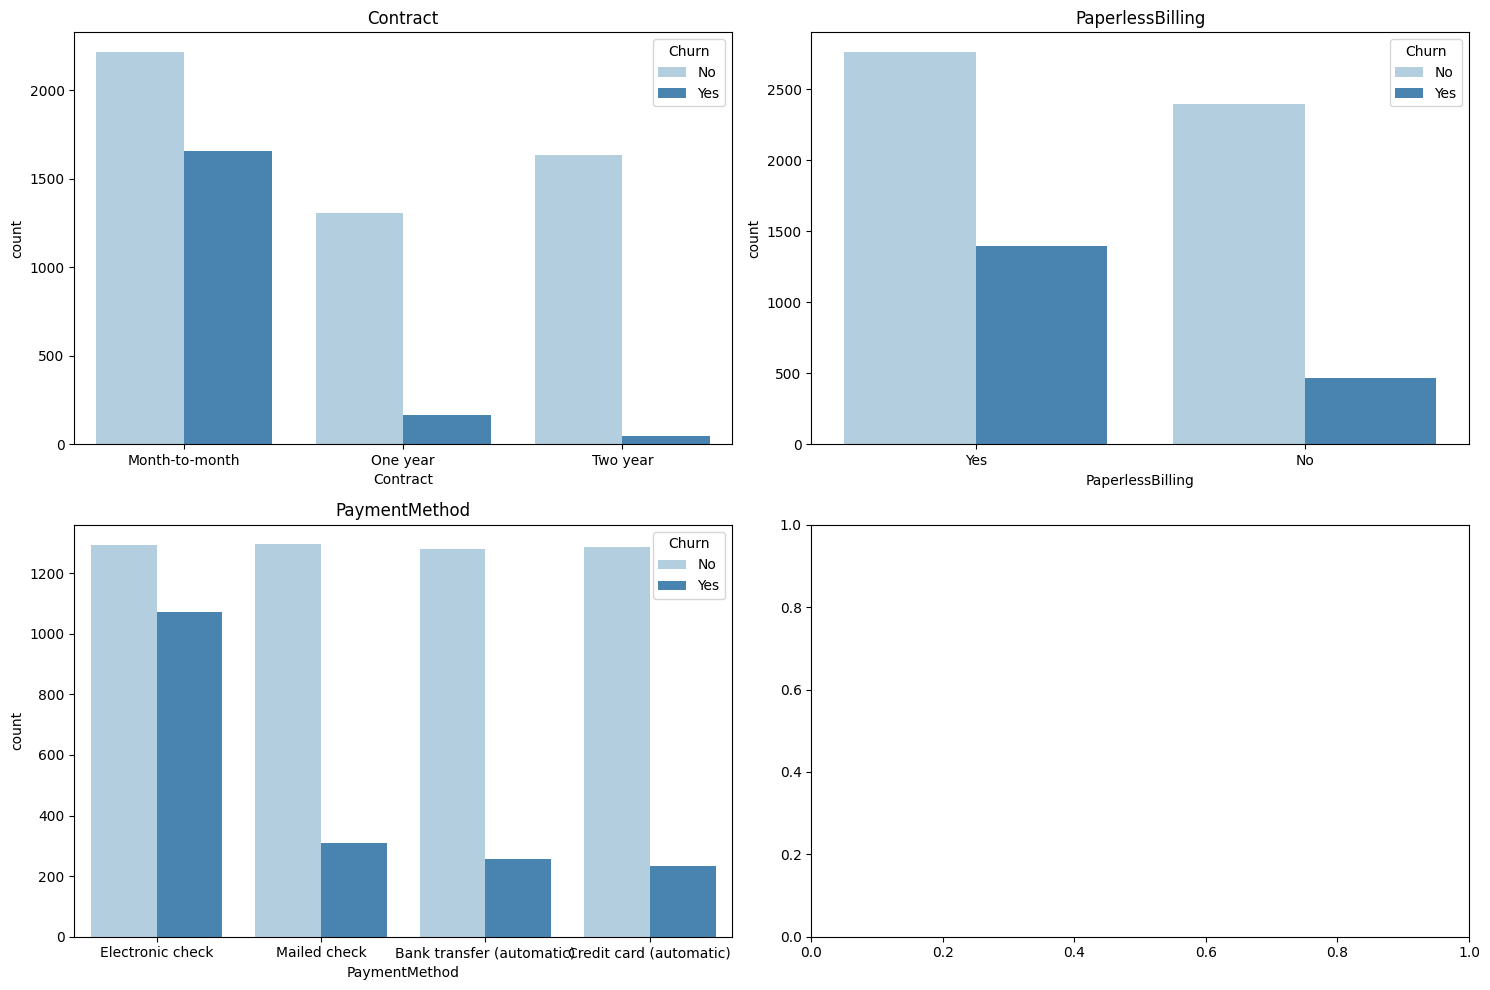

In [ ]:
# Analysis Customer Account Information
plot_categorical_to_target(df, ["Contract","PaperlessBilling","PaymentMethod"], 'Churn')

Diagram batang berikut di atas dapat menarik kesimpulan dari hal tersebut:

- Pelanggan lebih cenderung melakukan churn dengan kontrak bulanan.
- Tingkat churn yang cukup tinggi dengan metode pembayaran cek elektronik.
- Pelanggan dengan penagihan tanpa paper billing memiliki tingkat churn yang lebih tinggi.

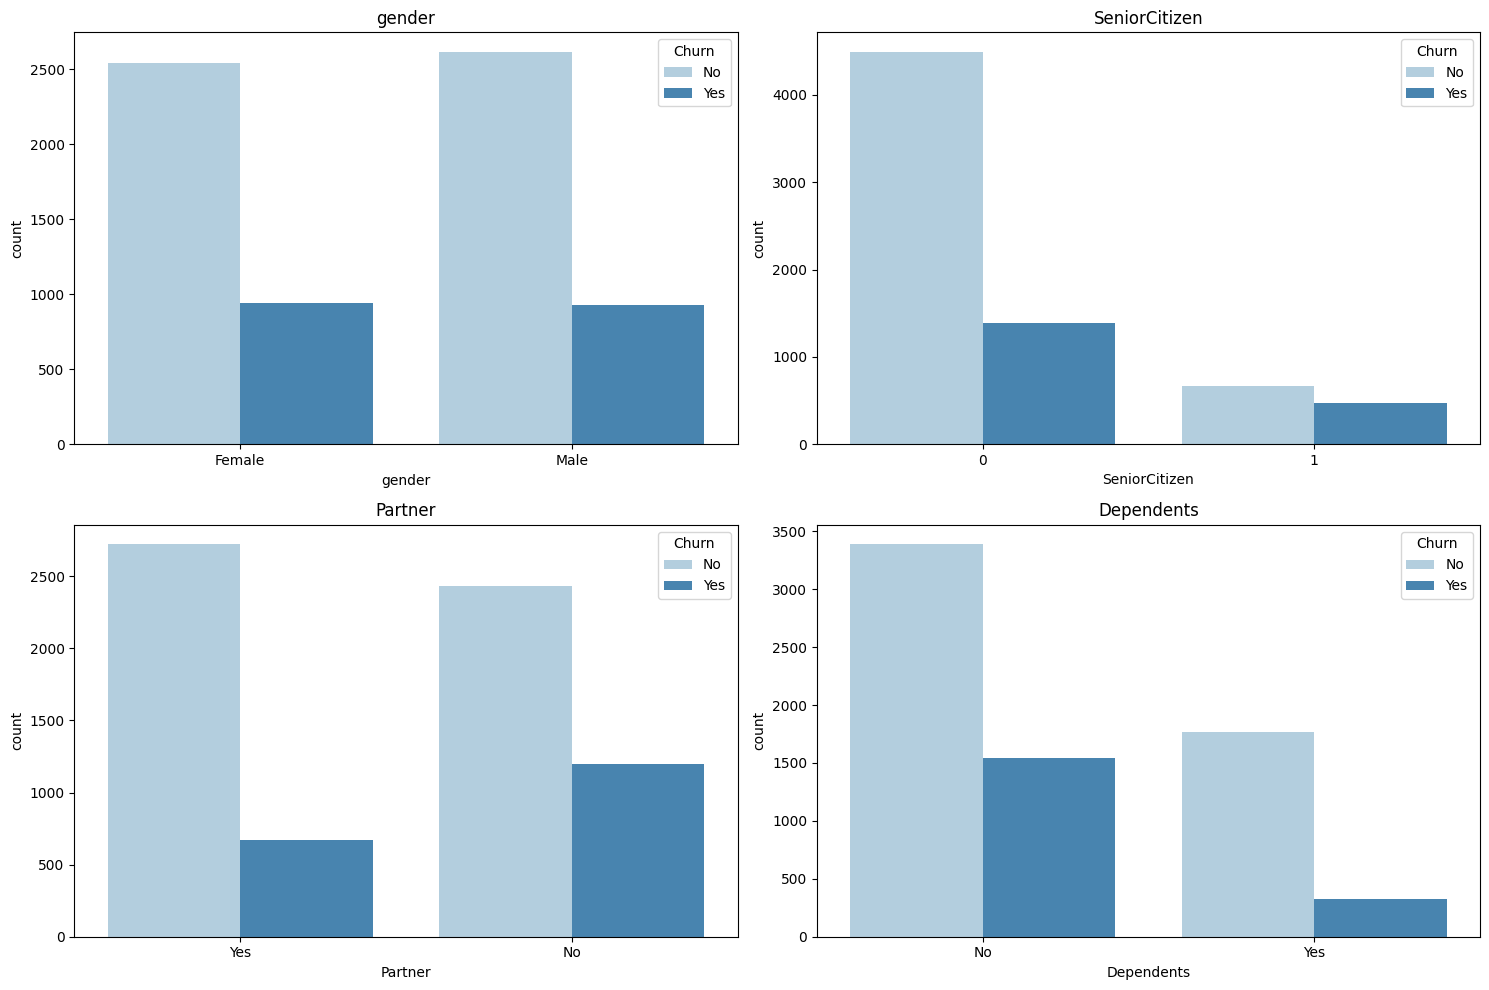

In [ ]:
#Analysis of Customer's Demographic Info
plot_categorical_to_target(df, ["gender", "SeniorCitizen", "Partner", "Dependents"], 'Churn')

Berikut bar plot diatas dapat kita tarik beberapa kesimpulan :

- Churn dan no churn no memiliki perbedaan pada setiap gender.
- Pelanggan muda lebih cenderung melakukan churn dibandingkan pelanggan lama.
- Pelanggan dengan mitra lebih sedikit churn jika dibandingkan dengan mitra.

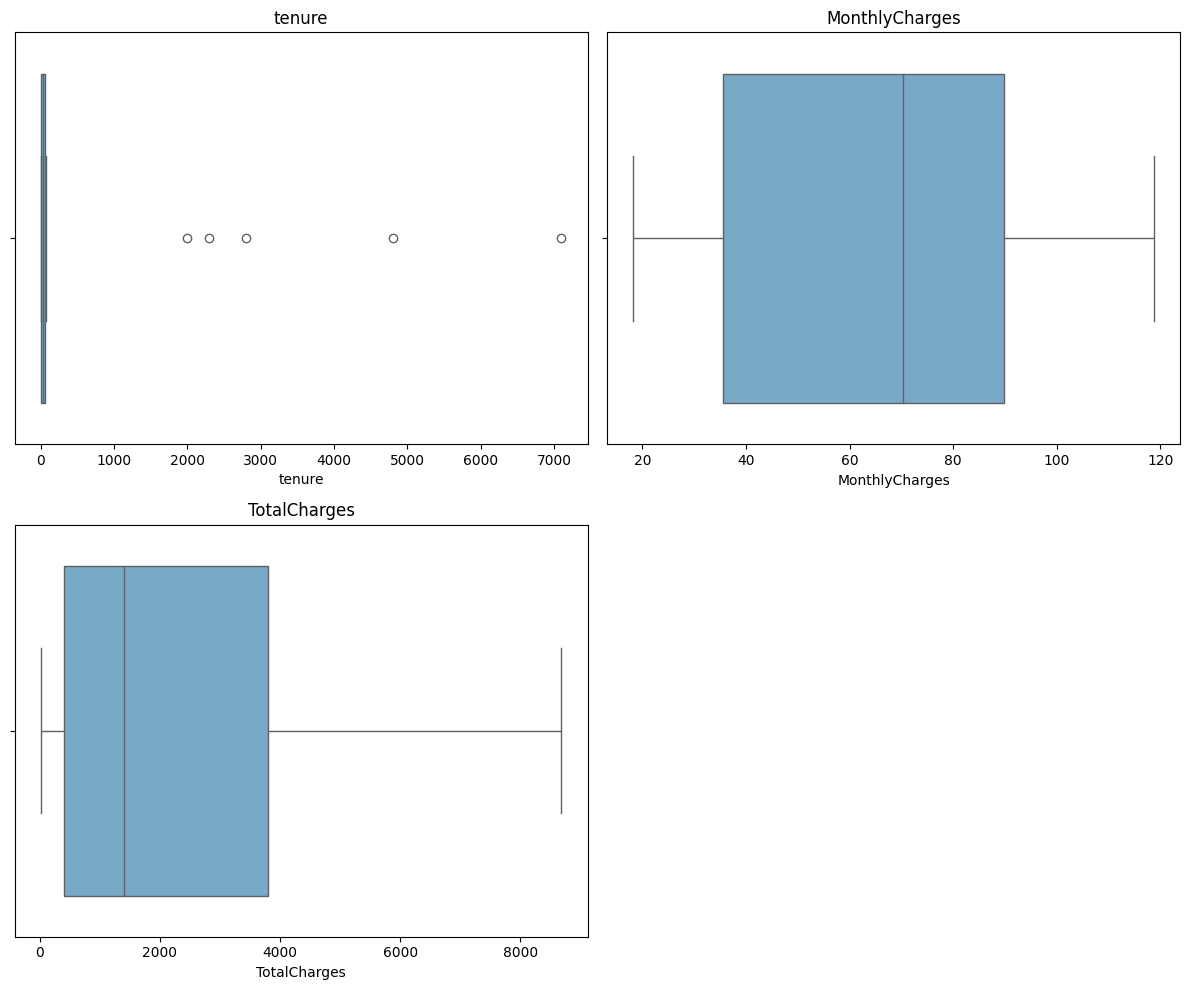

In [ ]:
#melihat outlier dari data set yang di gunakan

def outlier_check_boxplot(df, numerical_values):
    # Tentukan jumlah kolom dalam grid plot
    number_of_columns = 2
    # Tentukan jumlah baris dalam grid plot, menggunakan pembulatan ke atas
    number_of_rows = math.ceil(len(numerical_values) / number_of_columns)

    # Buat figur dengan ukuran yang sesuai dengan jumlah baris
    fig = plt.figure(figsize=(12, 5 * number_of_rows))

    # Iterasi melalui setiap kolom numerik, dengan indeks yang dimulai dari 1
    for index, column in enumerate(numerical_values, 1):
        # Tambahkan subplot ke figur, pada posisi yang sesuai
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        # Buat boxplot untuk kolom tertentu
        sns.boxplot(x=column, data=df, palette="Blues", ax=ax)
        # Setel judul subplot
        ax.set_title(column)

    # Tampilkan plot
    plt.tight_layout()
    return plt.show()

numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(df,numerical_values)

In [ ]:
# Hitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
q1 = df['tenure'].quantile(0.25)
q3 = df['tenure'].quantile(0.75)

# Hitung IQR (interquartile range)
iqr = q3 - q1

# Hitung batas bawah dan batas atas
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Hapus nilai outlier dari kolom "tenure" inplace
df = df[(df['tenure'] >= lower_bound) & (df['tenure'] <= upper_bound)]

# Menampilkan DataFrame setelah menghapus outlier
print("DataFrame setelah menghapus outlier pada kolom tenure:")
df.info()



DataFrame setelah menghapus outlier pada kolom tenure:
<class 'pandas.core.frame.DataFrame'>
Index: 7020 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7020 non-null   object 
 1   gender            7020 non-null   object 
 2   SeniorCitizen     7020 non-null   int64  
 3   Partner           7020 non-null   object 
 4   Dependents        7020 non-null   object 
 5   tenure            7020 non-null   float64
 6   PhoneService      7020 non-null   object 
 7   MultipleLines     7020 non-null   object 
 8   InternetService   7020 non-null   object 
 9   OnlineSecurity    7020 non-null   object 
 10  OnlineBackup      7020 non-null   object 
 11  DeviceProtection  7020 non-null   object 
 12  TechSupport       7020 non-null   object 
 13  StreamingTV       7020 non-null   object 
 14  StreamingMovies   7020 non-null   object 
 15  Contract          7020 non-null   objec

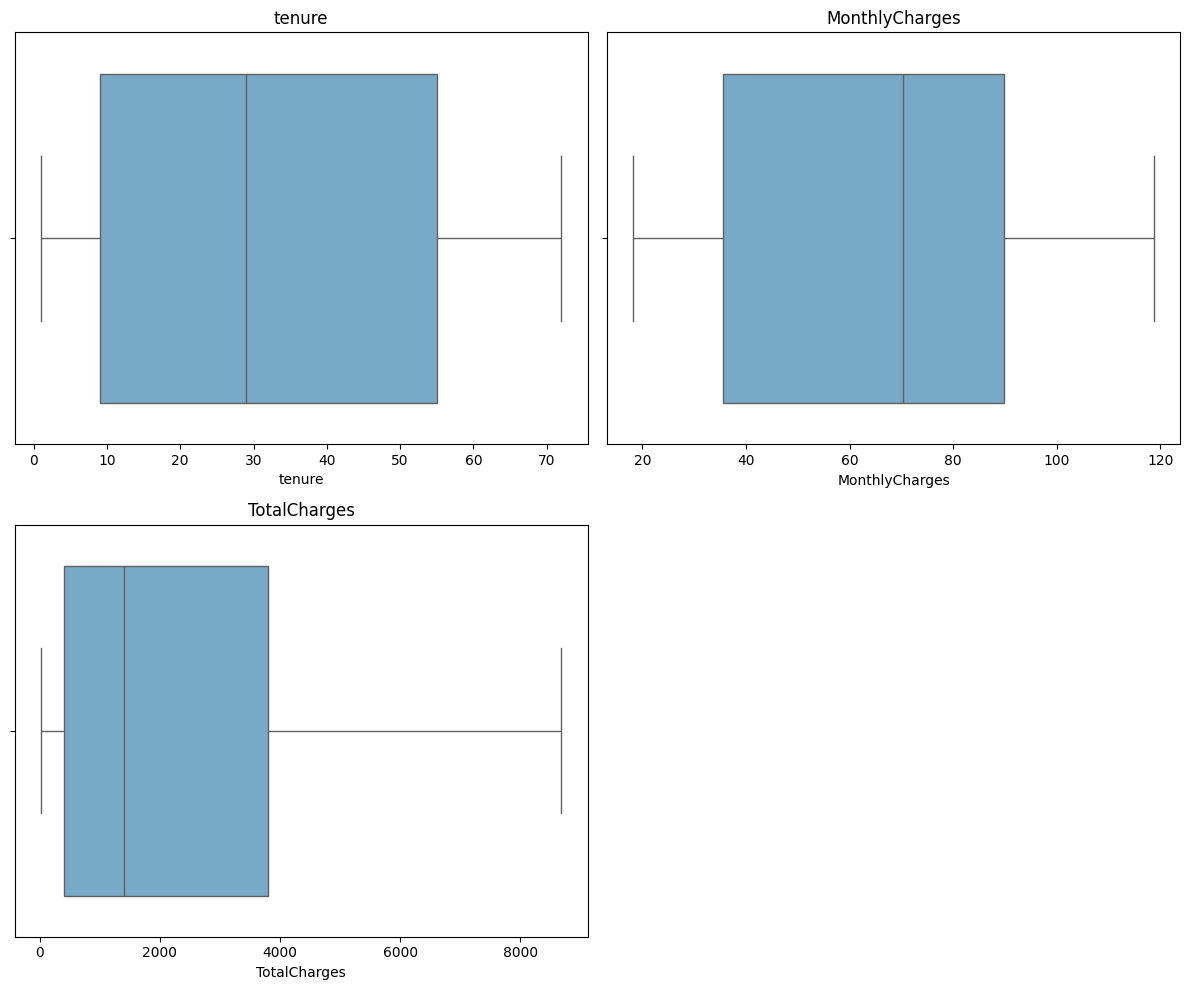

In [ ]:
# checking outlier
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(df,numerical_values)

In [ ]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)

    fig = plt.figure(figsize=(12,5*number_of_rows))

    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')

    return plt.show()

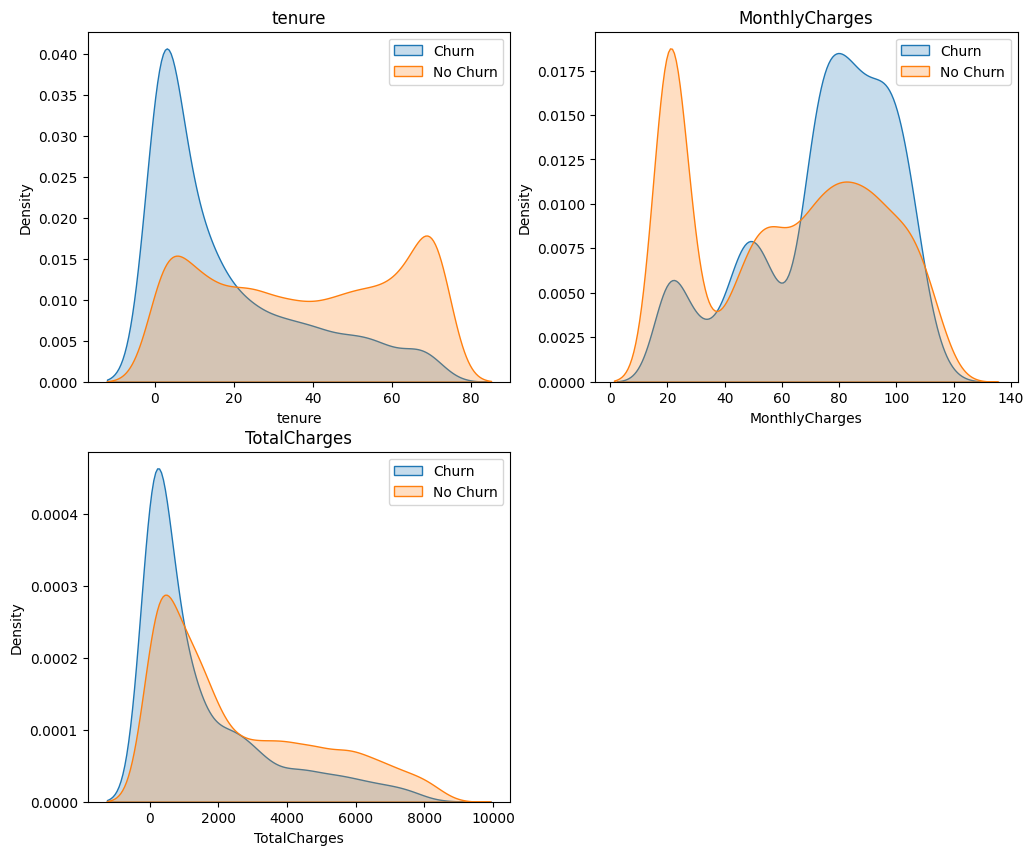

In [ ]:
customer_account_num = ["tenure", "MonthlyCharges","TotalCharges"]
histogram_plots(df,customer_account_num, "Churn")

Berdasarkan histogram diatas dapat kita peroleh kesimpulan bahwa:

- Pelanggan dengan masa kerja yang pendek lebih banyak yang churn.
- Pelanggan yang membayar lebih banyak untuk biaya bulanan memiliki tingkat churn yang lebih tinggi.
- Pelanggan dengan total biaya tinggi cenderung melakukan churn.

# mengkontruksi data

In [ ]:
# Daftar kolom yang akan dienkode
cols2 = ['gender','Partner','Dependents','PhoneService','MultipleLines',
         'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
         'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         "PaymentMethod",'Churn']

# Impor LabelEncoder dari scikit-learn
from sklearn.preprocessing import LabelEncoder

# Iterasi melalui setiap kolom dalam daftar cols2
for col in cols2:
    # Cetak nama kolom saat ini
    print(col)

    # Inisialisasi LabelEncoder
    label_encoder = LabelEncoder()

    # Fit dan transform kolom kategori, mengubah nilai kategori menjadi nilai numerik
    df[col] = label_encoder.fit_transform(df[col])



gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1.0,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34.0,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2.0,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45.0,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2.0,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df.drop("customerID",axis=1,inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


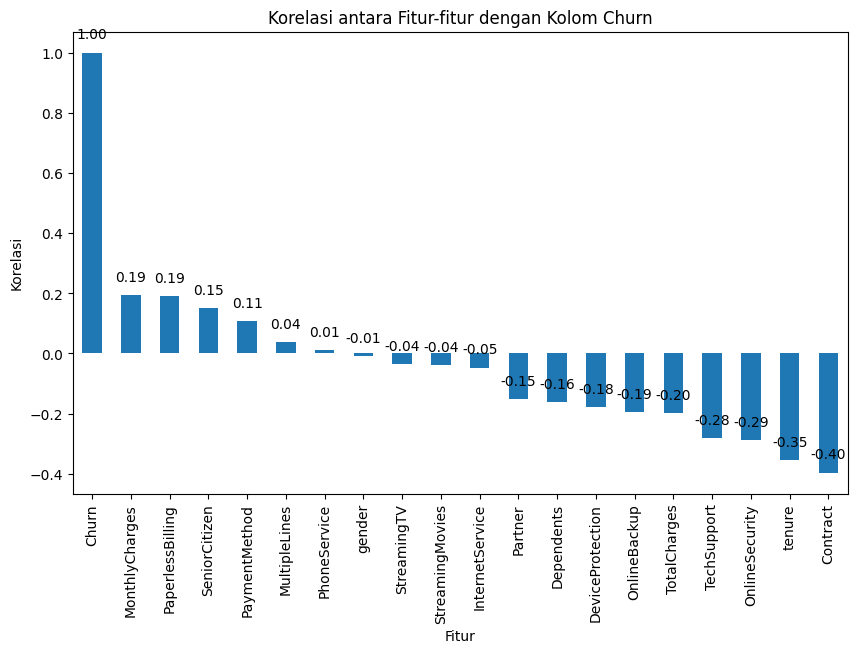

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mengatur ukuran gambar plot
plt.figure(figsize=(10, 6))

# Menghitung korelasi antara setiap fitur dengan kolom 'Churn'
correlation_series = df.corr()["Churn"].sort_values(ascending=False)

# Membuat plot batang dari seri korelasi
correlation_series.plot(kind="bar")

# Menambahkan anotasi untuk setiap batang di plot
for i, corr in enumerate(correlation_series):
    # Menambahkan teks yang menunjukkan nilai korelasi pada setiap batang
    plt.annotate(f"{corr:.2f}", (i, corr), textcoords="offset points", xytext=(0, 10), ha='center')

# Menambahkan judul plot
plt.title('Korelasi antara Fitur-fitur dengan Kolom Churn')

# Menambahkan label sumbu x
plt.xlabel('Fitur')

# Menambahkan label sumbu y
plt.ylabel('Korelasi')

# Menampilkan plot
plt.show()


# data modelling

split data

In [ ]:

from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns="Churn")  # Menghapus kolom 'Churn' dari DataFrame untuk mendapatkan fitur
y = df["Churn"]  # Menyimpan kolom 'Churn' sebagai target

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(
    X, y,  # Data fitur dan target
    test_size=0.2,  # Proporsi data yang akan digunakan sebagai data uji (20%)
    random_state=42,  # Menetapkan seed untuk mendapatkan hasil yang sama setiap kali kode dijalankan
    stratify=y  # Membagi data secara stratifikasi berdasarkan target (y) untuk menjaga proporsi kelas yang sama di setiap set
)

# Menampilkan bentuk (dimensi) dari set pelatihan dan pengujian
X_train.shape, X_test.shape, y_train.shape, y_test.shape




((5616, 19), (1404, 19), (5616,), (1404,))

In [ ]:
 y_train, y_test

(2560    1
 4887    0
 3823    0
 6769    0
 5673    0
        ..
 4871    0
 5645    0
 1575    1
 5964    0
 5420    0
 Name: Churn, Length: 5616, dtype: int64,
 1470    0
 5618    0
 1178    1
 4840    0
 5399    0
        ..
 4347    0
 215     0
 1119    0
 5721    0
 838     0
 Name: Churn, Length: 1404, dtype: int64)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Menstandardisasi data pelatihan
X_train = scaler.fit_transform(X_train)

# Menstandardisasi data pengujian menggunakan parameter yang diperoleh dari data pelatihan
X_test = scaler.transform(X_test)


In [ ]:
X_train,X_test


(array([[ 0.98480208, -0.44031529, -0.96190732, ...,  0.40161956,
          0.95827308,  0.82321248],
        [-1.01543246, -0.44031529,  1.0396012 , ...,  1.34219314,
         -1.48522638, -0.66574744],
        [ 0.98480208, -0.44031529,  1.0396012 , ..., -1.4795276 ,
          0.46290152,  1.53307855],
        ...,
        [ 0.98480208, -0.44031529, -0.96190732, ...,  0.40161956,
          1.15175153,  1.95120372],
        [-1.01543246, -0.44031529,  1.0396012 , ..., -1.4795276 ,
         -0.10752634,  0.32418548],
        [ 0.98480208, -0.44031529,  1.0396012 , ..., -0.53895402,
          1.64545518,  2.62816618]]),
 array([[-1.01543246, -0.44031529, -0.96190732, ...,  1.34219314,
         -1.52692432, -0.94133445],
        [ 0.98480208, -0.44031529, -0.96190732, ...,  1.34219314,
         -1.48856221, -0.91555885],
        [ 0.98480208, -0.44031529, -0.96190732, ...,  0.40161956,
          1.21346449, -0.3247063 ],
        ...,
        [ 0.98480208, -0.44031529,  1.0396012 , ..., -

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#, K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
actual = y_test  # Actual target values
# Create confusion matrices
knn_cm = confusion_matrix(actual, knn_pred)
dt_cm = confusion_matrix(actual, dt_pred)
rf_cm = confusion_matrix(actual, rf_pred)


# Convert confusion matrices to DataFrames
def confusion_matrix_to_dataframe(cm):
    labels = sorted(set(actual))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm

# Convert confusion matrices to DataFrames with labels
knn_cm_df = confusion_matrix_to_dataframe(knn_cm)
dt_cm_df = confusion_matrix_to_dataframe(dt_cm)
rf_cm_df = confusion_matrix_to_dataframe(rf_cm)


In [ ]:
knn_cm_df

Predicted,0,1
Actual,,
0,874,157
1,194,179


In [ ]:
dt_cm_df

Predicted,0,1
Actual,,
0,832,199
1,181,192


In [ ]:
rf_cm_df

Predicted,0,1
Actual,,
0,931,100
1,202,171


In [ ]:
# eavaluasi model

def evaluate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, accuracy, precision, recall, f1


# Evaluate KNN
knn_cm, knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate(y_test, knn_pred)

# Evaluate Decision Tree
dt_cm, dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate(y_test, dt_pred)

# Evaluate Random Forest
rf_cm, rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate(y_test, rf_pred)


# evaluasi

In [ ]:
# evaluasi model knn
print('Model knn\n')
print('knn_accuracy\t:', knn_accuracy)
print('knn_Precision\t:', knn_precision)
print('knn_recall\t:', knn_recall)

Model knn

knn_accuracy	: 0.75
knn_Precision	: 0.7424731362582487
knn_recall	: 0.75


In [ ]:
# evaluasi model Decision Tree
print('Model dt\n')
print('dt_accuracy\t:', dt_accuracy)
print('dt_Precision\t:', dt_precision)
print('dt_recall\t:', dt_recall)

Model dt

dt_accuracy	: 0.7293447293447294
dt_Precision	: 0.7335790140909271
dt_recall	: 0.7293447293447294


In [ ]:
# evaluasi model random forest
print('Model rf\n')
print('rf_accuracy\t:', rf_accuracy)
print('rf_Precision\t:', rf_precision)
print('rf_recall\t:', rf_recall)

Model rf

rf_accuracy	: 0.7849002849002849
rf_Precision	: 0.7710448520286229
rf_recall	: 0.7849002849002849


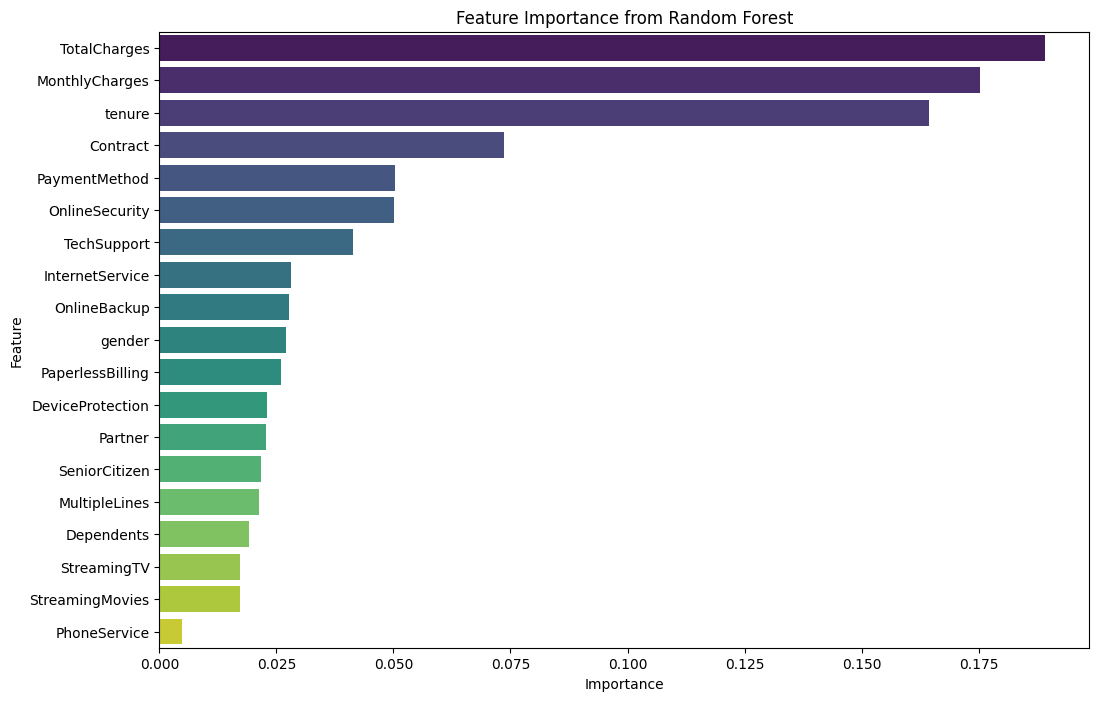

In [ ]:
#Visualisasi feature importances

# Mengambil feature importances dari model Random Forest
rf_feature_importance = rf.feature_importances_

# Mengambil nama fitur dari dataset
feature_names = X.columns

# Membuat DataFrame dari feature importances
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importance})

# Mengurutkan DataFrame berdasarkan feature importances secara menurun
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi menggunakan Seaborn dan Matplotlib
plt.figure(figsize=(12, 8))  # Mengatur ukuran gambar plot
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df, palette='viridis')  # Membuat plot menggunakan Seaborn
plt.title('Feature Importance from Random Forest')  # Menambahkan judul plot
plt.xlabel('Importance')  # Menambahkan label pada sumbu x
plt.ylabel('Feature')  # Menambahkan label pada sumbu y
plt.show()  # Menampilkan plot



In [ ]:
# mennaytukan dataset dengan hasil prediksi dari ke 3 model

# Buat salinan DataFrame asli untuk menambahkan hasil prediksi
df_with_predictions = df.copy()

# Membuat DataFrame untuk data uji dan hasil prediksi
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Menambahkan hasil prediksi ke DataFrame uji
X_test_df['KNN_Predictions'] = knn_pred
X_test_df['RF_Predictions'] = rf_pred
X_test_df['DT_Predictions'] = dt_pred

# Menggabungkan kembali dengan indeks asli untuk memastikan alignment yang benar
X_test_df.index = df_with_predictions.index[:len(X_test_df)]

# Menggabungkan hasil prediksi ke DataFrame asli
df_with_predictions.loc[X_test_df.index, 'KNN_Predictions'] = X_test_df['KNN_Predictions']
df_with_predictions.loc[X_test_df.index, 'RF_Predictions'] = X_test_df['RF_Predictions']
df_with_predictions.loc[X_test_df.index, 'DT_Predictions'] = X_test_df['DT_Predictions']

# Menampilkan DataFrame dengan hasil prediksi
df_with_predictions.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,KNN_Predictions,RF_Predictions,DT_Predictions
0,0,0,1,0,1.0,0,1,0,0,2,...,0,0,1,2,29.85,29.85,0,0.0,0.0,1.0
1,1,0,0,0,34.0,1,0,0,2,0,...,0,1,0,3,56.95,1889.50,0,0.0,0.0,0.0
2,1,0,0,0,2.0,1,0,0,2,2,...,0,0,1,3,53.85,108.15,1,0.0,0.0,1.0
3,1,0,0,0,45.0,0,1,0,2,0,...,0,1,0,0,42.30,1840.75,0,1.0,0.0,0.0
4,0,0,0,0,2.0,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,0.0,0.0,0.0


In [ ]:
# Menghitung jumlah churn knn prediction
churn_counts = df_with_predictions['KNN_Predictions'].value_counts()

print("Jumlah Tidak Churn:", churn_counts[0])
print("Jumlah Churn:", churn_counts[1])

Jumlah Tidak Churn: 1068
Jumlah Churn: 336


In [ ]:
# Menghitung jumlah churn random forest
churn_counts = df_with_predictions['RF_Predictions'].value_counts()

print("Jumlah Tidak Churn:", churn_counts[0])
print("Jumlah Churn:", churn_counts[1])

Jumlah Tidak Churn: 1133
Jumlah Churn: 271


In [ ]:
# Menghitung jumlah churn Random forest
churn_counts = df_with_predictions['DT_Predictions'].value_counts()

print("Jumlah Tidak Churn:", churn_counts[0])
print("Jumlah Churn:", churn_counts[1])


Jumlah Tidak Churn: 1013
Jumlah Churn: 391
